In [1]:
# enable inline plotting with matplotbib and seaborn
%matplotlib inline
import numpy as np
import pylab as pl
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)
import random
import time


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# Libraries for constructing Pipelines
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.decomposition import PCA

# Library for Normalization of Numerical Data
import scipy.stats 

from sklearn.feature_selection import RFE, SelectKBest, chi2, SelectFromModel

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import (accuracy_score,confusion_matrix, classification_report, roc_auc_score,
f1_score, recall_score, precision_score, SCORERS)

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
def pipeline_metrics(pipedict, hyperdict, scoring='accuracy', display=True):
    model_scores=[]
    fitted_models={}
    for name, pipeline in pipedict.items():
    # Construct grid search
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=5, verbose=2, n_jobs=-1, return_train_score = True)

        # Fit using grid search
        start = time.time()
        model.fit(x_normal, y)
        end = time.time()
        #Append scores and time
        model_scores.append((name,model.best_score_,end-start))
        #Append model
        fitted_models[name]=model
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted!')
            # Best accuracy
            print('The best RMSE score is : %.3f' % model.best_score_)
            # Best params
            print('The best params:\n', model.best_params_,'\n')
            means = model.cv_results_['mean_test_score']
            stds = model.cv_results_['std_test_score']
            params = model.cv_results_['params']
            for mean, stdev, param in zip(means, stds, params):
                print('{0} ({1}) with: {2}'.format(mean, stdev, param))
    
    return model_scores, fitted_models

In [6]:
data = pd.read_csv("train_data.csv")
print(data.columns)

Index(['Hours', 'Scores'], dtype='object')


In [7]:
print("Number of observations: ", len(data))
data.head(10)

Number of observations:  25


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
def checkMissingValues(data):
    drop_columns = [] 
    for col in data.columns:
        if (data[col].isnull().sum() > 0.85*data.shape[0]):
            drop_columns.append(col)
    data = data.drop(drop_columns,axis=1)
    
    data1 = data.dropna()
    
    return len(data1.columns)

checkMissingValues(data)

2

In [10]:
def checkCatOrNum(data1):
    numeric_feature_columns = list(data1._get_numeric_data().columns)
    categorical_feature_columns = list(set(data1.columns)-set(data1._get_numeric_data().columns))
    for col in numeric_feature_columns:
        if pd.unique(data1[col]).shape[0] < np.sqrt(data1.shape[0]):
            categorical_feature_columns.append(col)
            numeric_feature_columns.remove(col)
            
    print("Numerical feature's are: ",numeric_feature_columns) 
    print("Categorical features are: ",categorical_feature_columns)
    
    return numeric_feature_columns,categorical_feature_columns

numvars,catvars = checkCatOrNum(data)

Numerical feature's are:  ['Hours', 'Scores']
Categorical features are:  []


In [11]:
for x in range(len(numvars)):
    print(numvars[x],": ", data[numvars[x]].min()," - ",data[numvars[x]].max())

Hours :  1.1  -  9.2
Scores :  17  -  95


# EDA

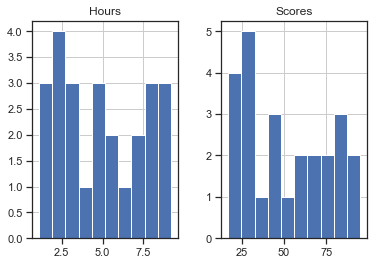

In [14]:
data.hist()
plt.show()

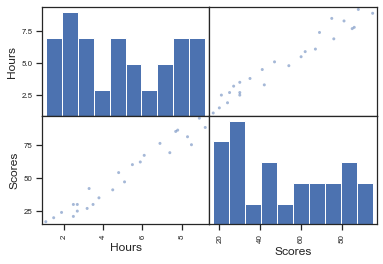

In [16]:
# scatter matrix to see the relatioship between the variables
scatter_matrix(data)
plt.show()

# Data Modelling

In [17]:
X = data.loc[:, data.columns != 'Scores']
y = data.loc[:, data.columns == 'Scores']
#x1 = X.copy()

In [18]:
#### Normalizing the Dataset
ss = StandardScaler()

x_normal = ss.fit_transform(X)

In [24]:
#Create pipeline for each of the classifiers.
pipelines = {'linearregression': Pipeline([('pca', PCA()),
                                            ('clf', LinearRegression())])}
#             'randomforest':Pipeline([('pca', PCA()),
#                                             ('clf', RandomForestRegressor(random_state=123))]),
#             'gradientboosting': Pipeline([('pca', PCA()),
#                                             ('clf', GradientBoostingRegressor(random_state=123))]),
#             'supportvectorregressor' : Pipeline([('pca', PCA()),
#                                             ('clf', SVR())])}
                                                

#Define Hyperparameters for each pipeline
hyperparameters_lr ={}

# hyperparameters_rf ={'clf__n_estimators': [100,150],
#                      'clf__max_depth': [4, 5, 6]}

# hyperparameters_gb ={'clf__n_estimators': [10,15], 
#                      'clf__max_depth': [1, 3, 5],  
#                      'clf__learning_rate': [0.05,0.1]}

#Instantiate hyperparapeter dictionary
hyperparameters = {'linearregression':hyperparameters_lr}
#                    'randomforest':hyperparameters_rf,
#                    'supportvectorregressor' : hyperparameters_svr,
#                    'gradientboosting': hyperparameters_gb}

In [25]:
model_scores_auc, fitted_models_auc = pipeline_metrics(pipelines,hyperparameters,scoring='r2')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
The linearregression model has been fitted!
The best RMSE score is : 0.918
The best params:
 {} 

0.9180771341891052 (0.06877822891279645) with: {}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [26]:
score_times_df_r2 = pd.DataFrame(model_scores_auc,columns=['regressor','r2_score','time']).set_index('regressor').sort_values('time')
score_times_df_r2

,r2_score,time
regressor,,
linearregression,0.918077,0.030888


# Test the model

In [27]:
test = pd.read_csv('test_data.csv')

In [30]:
regressor = LinearRegression()

In [49]:
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
y_pred = regressor.predict(np.array([9.5]).reshape((-1,1)))

In [51]:
y_pred

array([[95.35380562]])